# Self-Organizing Maps

## Praktikum

### a) Fungsi *self-organizing maps*
Tulis kode ke dalam *cell* di bawah ini:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def som(X, lrate, b, max_epoch, n_cluster):
    centroids = np.random.uniform(size=(n_cluster, len(X[0])))
    epoch = 0
    labels = []

    while epoch < max_epoch:
        for x in X:
            d = [sum((w - x) ** 2) for w in centroids]
            min = np.argmin(d)
            centroids[min] += lrate * (x - centroids[min])
        
        lrate *= b
        epoch += 1
    
    for x in X:
        d = [sum((w - x) ** 2) for w in centroids]
        min = np.argmin(d)
        labels.append(min)
    return centroids, labels

def draw(X, target, centroids):
    colors = 'rgbcmyk'

    for x, label in zip(X, target):
        plt.plot(x[0], x[1], colors[label] + '.')

    plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

### b) Klasterisasi
Tulis kode ke dalam *cell* di bawah ini:

Silhouette score: 0.7215682462170806


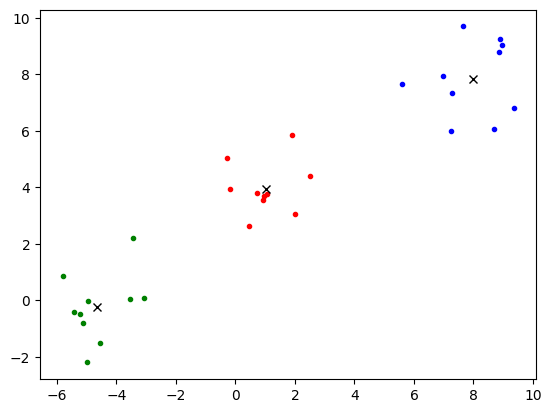

In [5]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples=30, n_features=2, centers=3, random_state=3)
centroids, labels = som(X, lrate=.5, b=.5, max_epoch=100, n_cluster=3)
silhouette = silhouette_score(X, labels)

print('Silhouette score:', silhouette)
draw(X, target, centroids)

## Analisis

1. Ubah parameter pada kode b menjadi learning rate = 0,05 dan epoch
maksimum = 3 lalu jalankan program. Amati gambar hasil klasterisasi dan
nilai silhouette yang didapatkan.

Silhouette score: 0.29613180669265315


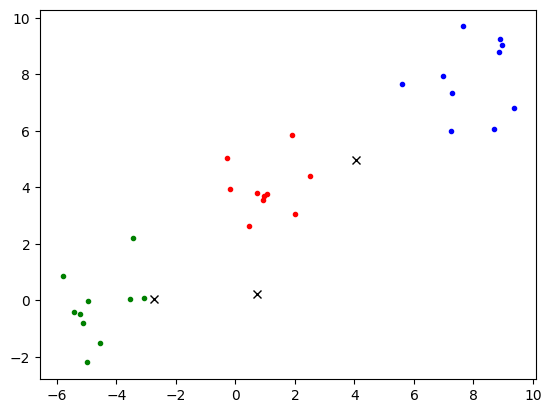

In [6]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples=30, n_features=2, centers=3, random_state=3)
centroids, labels = som(X, lrate=.05, b=.5, max_epoch=3, n_cluster=3)
silhouette = silhouette_score(X, labels)

print('Silhouette score:', silhouette)
draw(X, target, centroids)

## Kesimpulan : 

1. Jelaskan tentang SOM dan fungsi centroid didalam SOM
2. Jelaskan alur kerja kodingan pada bagian "Fungsi self-organizing maps"

Jawab:

1. Self-Organizing Maps (SOM) adalah jenis jaringan saraf tiruan yang digunakan untuk mengurangi dimensi data dan mengklasifikasikan data dengan cara yang tidak terawasi. SOM bekerja dengan mengelompokkan data ke dalam unit-unit (atau neuron) dalam bentuk grid, di mana setiap neuron memiliki satu centroid yang mewakili karakteristik dari kelompok data tertentu. Fungsi centroid dalam SOM adalah untuk menentukan posisi setiap neuron dalam ruang fitur dan untuk menghitung jarak antara data input dengan centroid, sehingga neuron yang paling dekat dengan input dapat diaktifkan dan diperbarui, memungkinkan jaringan untuk belajar dari data.

2. Alur kerja kodingan pada bagian "Fungsi Self-Organizing Maps" umumnya dimulai dengan inisialisasi bobot neuron yang mewakili centroid dari setiap neuron. Kemudian, fungsi akan mengambil data input dan menghitung jarak antara data input dan centroid neuron menggunakan metrik jarak, seperti Euclidean. Neuron dengan jarak terdekat, yang disebut Best Matching Unit (BMU), akan diidentifikasi. Setelah BMU ditemukan, bobot centroid BMU dan neuron tetangga akan diperbarui berdasarkan learning rate dan radius. Proses ini diulang untuk sejumlah iterasi, di mana model belajar dan menyusun data ke dalam peta yang terorganisir berdasarkan kemiripan fitur.